# Evalaution Method 3: LLM Evaluation

## Method 1: Naive Yes/No Prompting

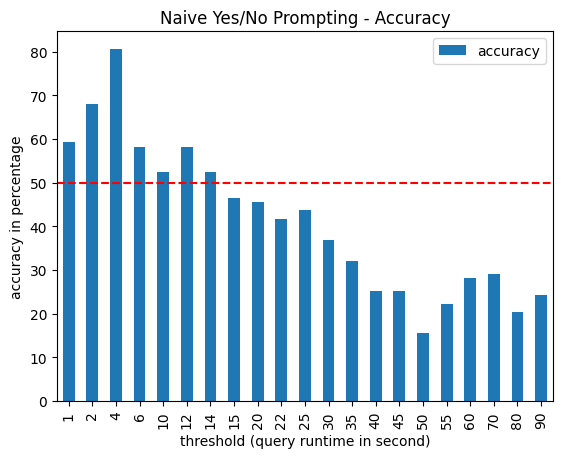

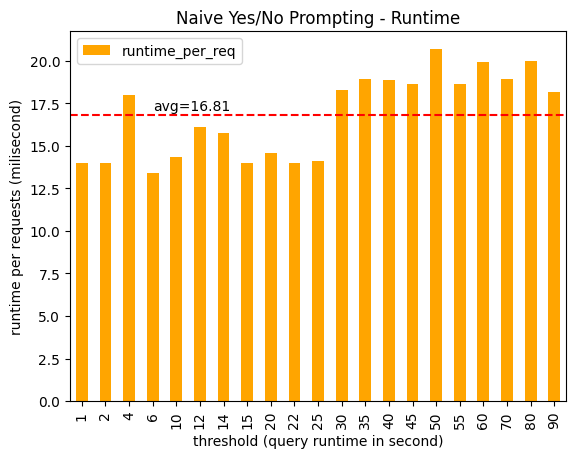

In [47]:
import numpy as np
import pandas as pd
from io import StringIO

df = pd.read_csv(StringIO("""threshold,runtime,reqs,False,True
1,1.44,103,42,61
2,1.44,103,33,70
4,1.85,103,20,83
6,1.38,103,43,60
10,1.48,103,49,54
12,1.66,103,43,60
14,1.62,103,49,54
15,1.44,103,55,48
20,1.50,103,56,47
22,1.44,103,60,43
25,1.45,103,58,45
30,1.88,103,65,38
35,1.95,103,70,33
40,1.94,103,77,26
45,1.92,103,77,26
50,2.13,103,87,16
55,1.92,103,80,23
60,2.05,103,74,29
70,1.95,103,73,30
80,2.06,103,82,21
90,1.87,103,78,25"""))

df['accuracy'] = df['True'] / df['reqs'] * 100 # percentage

# Plot a bar chart where x-axis is the threshold and y-axis is accuracy.
# x-axis label should be threshold (query runtime in second)
# y-axis label should be accuracy in percentage
# title should be "LLM Evaluation"
# legend should be naive yes/no prompting
df.plot.bar(
    x='threshold', y='accuracy', title='Naive Yes/No Prompting - Accuracy',
    xlabel='threshold (query runtime in second)', ylabel='accuracy in percentage',
)
# Draw a horizontal line at 50% accuracy
import matplotlib.pyplot as plt
plt.axhline(y=50, color='r', linestyle='--')

# save figure to png
import matplotlib.pyplot as plt
plt.savefig('sec4_3-llm-01-naive-accuracy.png')

# Plot another chart about the query runtime
# x-axis is the threshold and y-axis is runtime
df['runtime_per_req'] = df['runtime'] / df['reqs'] * 1000
df.plot.bar(
    x='threshold', y='runtime_per_req', title='Naive Yes/No Prompting - Runtime',
    xlabel='threshold (query runtime in second)', 
    ylabel='runtime per requests (milisecond)',
    color='orange',
)

# Draw a line at average runtime, and add text to show the average runtime
plt.axhline(y=df['runtime_per_req'].mean(), color='r', linestyle='--')
plt.text(3, df['runtime_per_req'].mean() + 0.3, f'avg={df["runtime_per_req"].mean():.2f}', color='black')

plt.savefig('sec4_3-llm-01-naive-runtime.png')

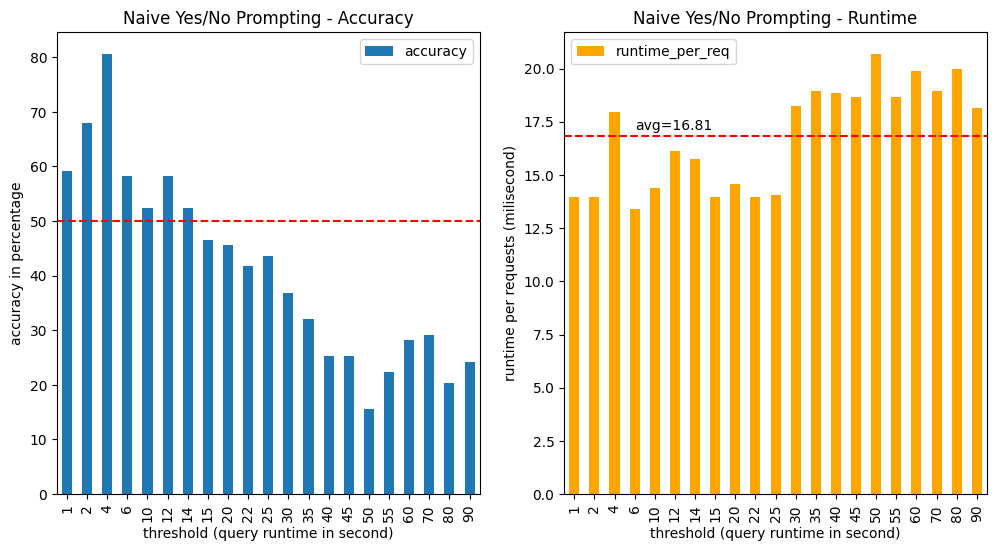

In [85]:
import numpy as np
import pandas as pd
from io import StringIO

df = pd.read_csv(StringIO("""threshold,runtime,reqs,False,True
1,1.44,103,42,61
2,1.44,103,33,70
4,1.85,103,20,83
6,1.38,103,43,60
10,1.48,103,49,54
12,1.66,103,43,60
14,1.62,103,49,54
15,1.44,103,55,48
20,1.50,103,56,47
22,1.44,103,60,43
25,1.45,103,58,45
30,1.88,103,65,38
35,1.95,103,70,33
40,1.94,103,77,26
45,1.92,103,77,26
50,2.13,103,87,16
55,1.92,103,80,23
60,2.05,103,74,29
70,1.95,103,73,30
80,2.06,103,82,21
90,1.87,103,78,25"""))

df['accuracy'] = df['True'] / df['reqs'] * 100 # percentage

# Plot a similar bar chart of accuracy and runtime side by side (left to right) in 2 subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot accuracy
df.plot.bar(
    x='threshold', y='accuracy', title='Naive Yes/No Prompting - Accuracy',
    xlabel='threshold (query runtime in second)', ylabel='accuracy in percentage',
    ax=ax[0]
)
# Draw a horizontal line at 50% accuracy
ax[0].axhline(y=50, color='r', linestyle='--')

# Plot runtime
df['runtime_per_req'] = df['runtime'] / df['reqs'] * 1000
df.plot.bar(
    x='threshold', y='runtime_per_req', title='Naive Yes/No Prompting - Runtime',
    xlabel='threshold (query runtime in second)', 
    ylabel='runtime per requests (milisecond)',
    color='orange',
    ax=ax[1]
)

# Draw a line at average runtime, and add text to show the average runtime
ax[1].axhline(y=df['runtime_per_req'].mean(), color='r', linestyle='--')
ax[1].text(3, df['runtime_per_req'].mean() + 0.3, f'avg={df["runtime_per_req"].mean():.2f}', color='black')

# save figure to png
plt.savefig('sec4_3-llm-01-naive-accuracy-runtime.png')




## Method 2: Reason-then-confirm Prompt

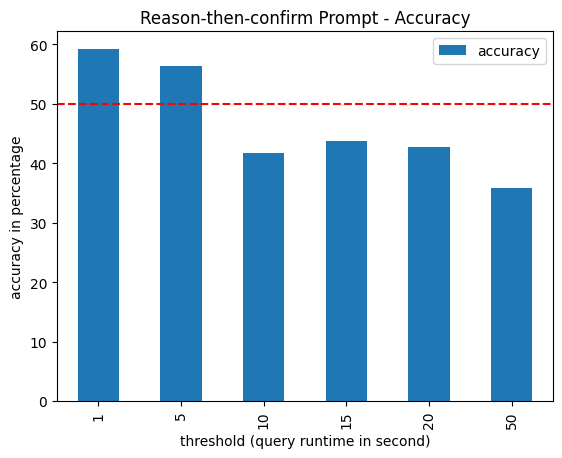

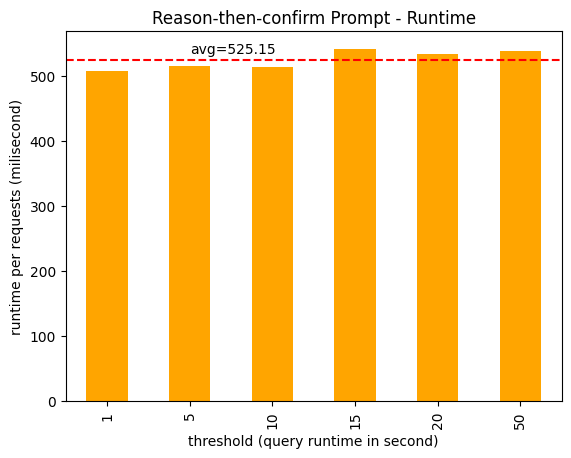

In [86]:
import pandas as pd
from io import StringIO

df = pd.read_csv(StringIO("""threshold,runtime,reqs,False,True
1,52.33,103,42,61
5,53.03,103,45,58
10,52.95,103,60,43
15,55.77,103,58,45
20,54.98,103,59,44
50,55.48,103,66,37"""))

df['accuracy'] = df['True'] / df['reqs'] * 100 # percentage

# Plot a bar chart where x-axis is the threshold and y-axis is accuracy.
# x-axis label should be threshold (query runtime in second)
# y-axis label should be accuracy in percentage
# title should be "LLM Evaluation"
df.plot.bar(
    x='threshold', y='accuracy', title='Reason-then-confirm Prompt - Accuracy',
    xlabel='threshold (query runtime in second)', ylabel='accuracy in percentage',
)
# Draw a horizontal line at 50% accuracy
import matplotlib.pyplot as plt
plt.axhline(y=50, color='r', linestyle='--')

# save figure to png
plt.savefig('sec4_3-llm-02-reason-accuracy.png')

# Plot another chart about the query runtime
# x-axis is the threshold and y-axis is runtime
df['runtime_per_req'] = df['runtime'] / df['reqs'] * 1000
df.plot.bar(
    x='threshold', y='runtime_per_req', title='Reason-then-confirm Prompt - Runtime',
    xlabel='threshold (query runtime in second)', 
    ylabel='runtime per requests (milisecond)',
    color='orange',
    legend=False
)

# Draw a line at average runtime, and add text to show the average runtime
plt.axhline(y=df['runtime_per_req'].mean(), color='r', linestyle='--')
plt.text(1, df['runtime_per_req'].mean() + 10, f'avg={df["runtime_per_req"].mean():.2f}', color='black')

plt.savefig('sec4_3-llm-02-reason-runtime.png')


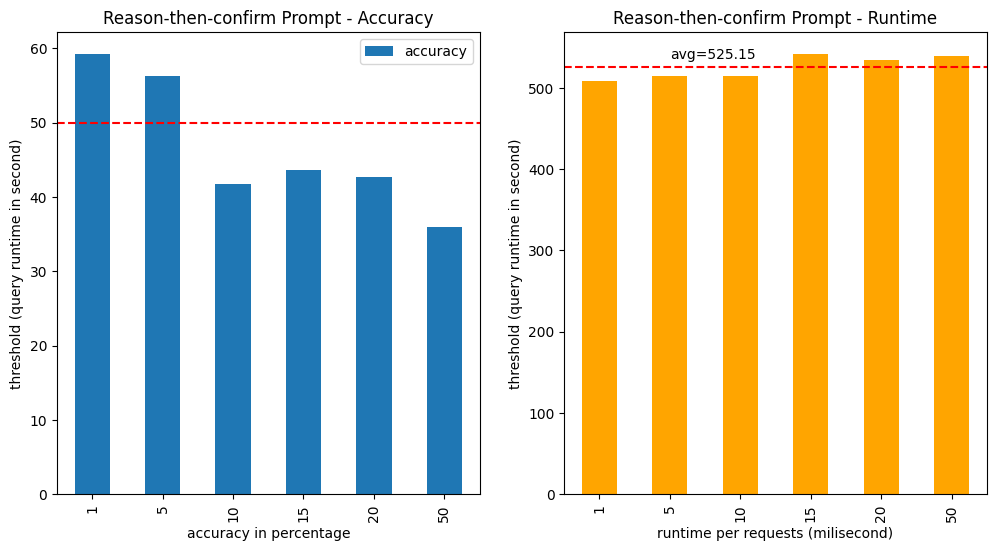

In [95]:
# Plot a similar bar chart of accuracy and runtime side by side (left to right) in 2 subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot accuracy
df.plot.bar(
    x='threshold', y='accuracy', title='Reason-then-confirm Prompt - Accuracy',
    xlabel='accuracy in percentage', ylabel='threshold (query runtime in second)',
    ax=ax[0]
)
# Draw a horizontal line at 50% accuracy
ax[0].axhline(y=50, color='r', linestyle='--')

# Plot runtime
df['runtime_per_req'] = df['runtime'] / df['reqs'] * 1000
df.plot.bar(
    x='threshold', y='runtime_per_req', title='Reason-then-confirm Prompt - Runtime',
    xlabel='runtime per requests (milisecond)', 
    ylabel='threshold (query runtime in second)',
    color='orange',
    legend=False,
    ax=ax[1]
)

# Draw a line at average runtime, and add text to show the average runtime
ax[1].axhline(y=df['runtime_per_req'].mean(), color='r', linestyle='--')
ax[1].text(1, df['runtime_per_req'].mean() + 10, f'avg={df["runtime_per_req"].mean():.2f}', color='black')


# save figure to png
plt.savefig('sec4_3-llm-02-reason-accuracy-runtime.png')




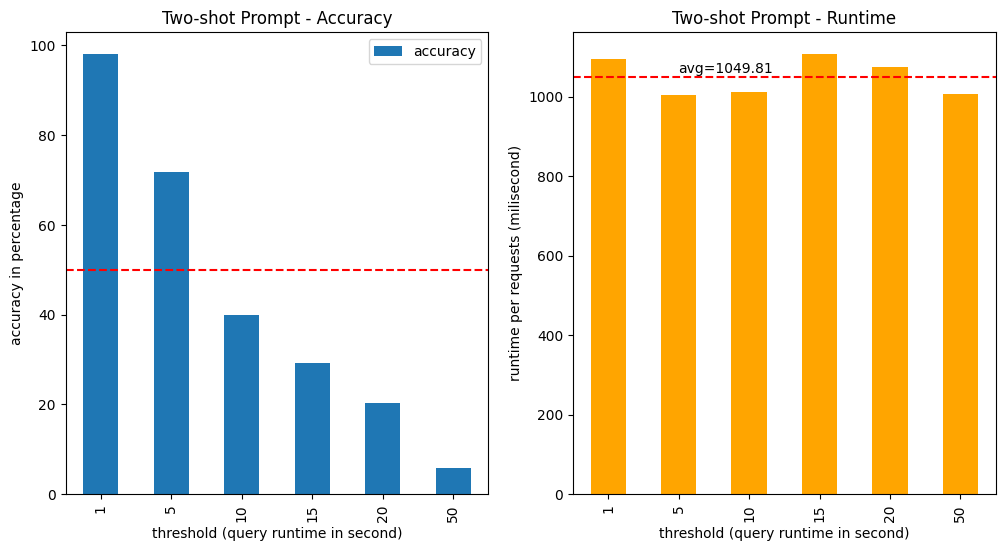

In [4]:
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
df = pd.read_csv(StringIO("""threshold,runtime,reqs,False,True
1,112.84,103,2,101
5,103.38,103,29,74
10,104.23,103,62,41
15,114.01,103,73,30
20,110.61,103,82,21
50,103.71,103,97,6"""))

df['accuracy'] = df['True'] / df['reqs'] * 100 # percentage

# Plot a bar chart where x-axis is the threshold and y-axis is accuracy.
# x-axis label should be threshold (query runtime in second)
# y-axis label should be accuracy in percentage
# title should be "LLM Evaluation"

# Plot a similar bar chart of accuracy and runtime side by side (left to right) in 2 subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    
# Plot accuracy
df.plot.bar(
    x='threshold', y='accuracy', title='Two-shot Prompt - Accuracy',
    xlabel='threshold (query runtime in second)', ylabel='accuracy in percentage',
    ax=ax[0]
)
# Draw a horizontal line at 50% accuracy
ax[0].axhline(y=50, color='r', linestyle='--')

# Plot runtime
df['runtime_per_req'] = df['runtime'] / df['reqs'] * 1000
df.plot.bar(
    x='threshold', y='runtime_per_req', title='Two-shot Prompt - Runtime',
    xlabel='threshold (query runtime in second)', 
    ylabel='runtime per requests (milisecond)',
    color='orange',
    legend=False,
    ax=ax[1]
)

# Draw a line at average runtime, and add text to show the average runtime
ax[1].axhline(y=df['runtime_per_req'].mean(), color='r', linestyle='--')
ax[1].text(1, df['runtime_per_req'].mean() + 10, f'avg={df["runtime_per_req"].mean():.2f}', color='black')

# save figure to png
plt.savefig('sec4_3-llm-03-two-example-prompt-accuracy-runtime.png')

## Compare Figures

{1, 10, 15, 20, 50}

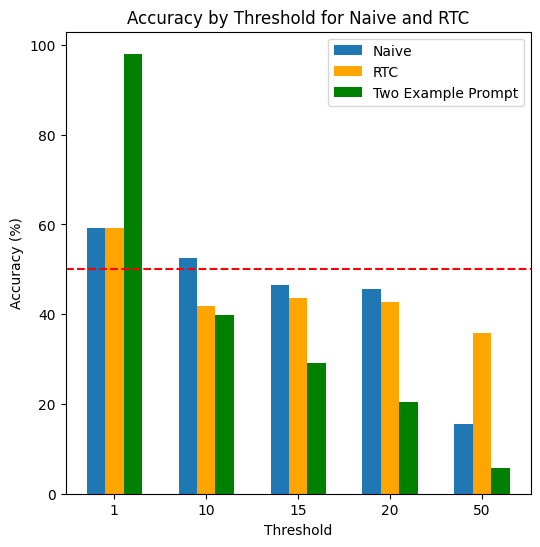

In [10]:
# Compare figures
def get_naive_df():
    df = pd.read_csv(StringIO("""threshold,runtime,reqs,False,True
1,1.44,103,42,61
2,1.44,103,33,70
4,1.85,103,20,83
6,1.38,103,43,60
10,1.48,103,49,54
12,1.66,103,43,60
14,1.62,103,49,54
15,1.44,103,55,48
20,1.50,103,56,47
22,1.44,103,60,43
25,1.45,103,58,45
30,1.88,103,65,38
35,1.95,103,70,33
40,1.94,103,77,26
45,1.92,103,77,26
50,2.13,103,87,16
55,1.92,103,80,23
60,2.05,103,74,29
70,1.95,103,73,30
80,2.06,103,82,21
90,1.87,103,78,25"""))
    
    df['accuracy'] = df['True'] / df['reqs'] * 100 # percentage
    return df

def get_rtc_df():
    df = pd.read_csv(StringIO("""threshold,runtime,reqs,False,True
1,52.33,103,42,61
5,53.03,103,45,58
10,52.95,103,60,43
15,55.77,103,58,45
20,54.98,103,59,44
50,55.48,103,66,37"""))

    df['accuracy'] = df['True'] / df['reqs'] * 100 # percentage
    return df

def get_two_example_prompts():
    df = pd.read_csv(StringIO("""threshold,runtime,reqs,False,True
1,112.84,103,2,101
5,103.38,103,29,74
10,104.23,103,62,41
15,114.01,103,73,30
20,110.61,103,82,21
50,103.71,103,97,6"""))

    df['accuracy'] = df['True'] / df['reqs'] * 100 # percentage
    return df




naive_df = get_naive_df()
rtc_df = get_rtc_df()
two_example_prompts_df = get_two_example_prompts()


x_values = sorted(set(naive_df['threshold'].tolist()) & set(rtc_df['threshold'].tolist()))
# filter naive_df and rtc_df to only include the x_values
naive_df = naive_df[naive_df['threshold'].isin(x_values)]
rtc_df = rtc_df[rtc_df['threshold'].isin(x_values)]
two_example_prompts_df = two_example_prompts_df[two_example_prompts_df['threshold'].isin(x_values)]
# Convert threshold to string type
# naive_df['threshold'] = naive_df['threshold'].astype(str)
# rtc_df['threshold'] = rtc_df['threshold'].astype(str)


# Plotting
fig, ax = plt.subplots(figsize=(6, 6))
width = 0.2  # width of the bars
import numpy as np
x_index = np.arange(len(x_values))

# Plotting naive_df
ax.bar(x_index - width, naive_df['accuracy'], width, label='Naive',)

# Plotting rtc_df
ax.bar(x_index, rtc_df['accuracy'], width, label='RTC', color='orange')

# Plotting two_example_prompts_df
ax.bar(x_index + width, two_example_prompts_df['accuracy'], width, label='Two Example Prompt', color='green')

# Set x-axis ticks to be only the x_values.
ax.set_xticks(x_index)
ax.set_xticklabels(x_values)
ax.set_xlabel('Threshold')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Accuracy by Threshold for Naive and RTC')
ax.legend()

# add a 50% accuracy line
plt.axhline(y=50, color='r', linestyle='--')
            

# save
plt.savefig('sec4_3-llm-compare-accuracy.png')